<a href="https://colab.research.google.com/github/EX1cyclone/635_project_pollution_detect/blob/main/feature_analyse1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

# Load the dataset
file_path = '/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(data.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [25]:
# Handling missing values
numerical_cols = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
categorical_cols = ['wd']

# Fill missing values for numerical columns with their mean
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing values for categorical columns with their mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encoding categorical variables
data = pd.get_dummies(data, columns=categorical_cols)

# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Assuming 'PM2.5' is the target variable
target = 'PM2.5'
features = [col for col in data.columns if col != target]

# Split the dataset into features and target
X = data[features]
y = data[target]


In [26]:
import pandas as pd

# Assuming your dataframe is named 'data' and your target variable is 'PM2.5'
target_variable = 'PM2.5'

# Calculate Pearson Correlation Coefficient for each feature with the target variable
correlation_with_target = data.corr()[target_variable]

# Display the correlation coefficients
print(correlation_with_target)


<ipython-input-26-4a8ee4ed4cd0>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()[target_variable]


No       -0.024671
year     -0.030612
month     0.025505
day       0.007920
hour     -0.010388
PM2.5     1.000000
PM10      0.877775
SO2       0.477462
NO2       0.679131
CO        0.757020
O3       -0.158904
TEMP     -0.129401
PRES     -0.005726
DEWP      0.120098
RAIN     -0.014002
WSPM     -0.278717
wd_E      0.088395
wd_ENE    0.098567
wd_ESE    0.065893
wd_N     -0.080518
wd_NE     0.054909
wd_NNE   -0.048347
wd_NNW   -0.120231
wd_NW    -0.131695
wd_S      0.028221
wd_SE     0.041384
wd_SSE    0.030441
wd_SSW    0.011106
wd_SW    -0.012780
wd_W     -0.018831
wd_WNW   -0.058898
wd_WSW   -0.026518
Name: PM2.5, dtype: float64


<ipython-input-27-5e75b7c05d7f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()[target_variable]


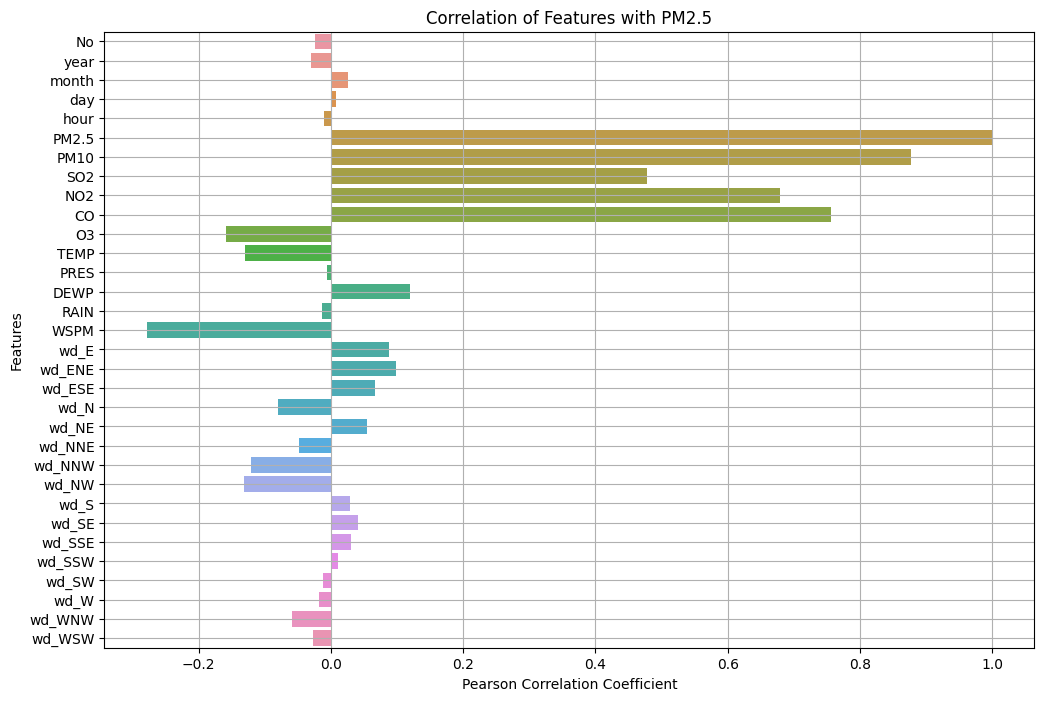

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Pearson Correlation Coefficient for each feature with the target variable
correlation_with_target = data.corr()[target_variable]

# Create a bar plot for visualizing the correlation of each feature with the target variable
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)

# Adding labels and title for clarity
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation of Features with PM2.5')
plt.grid(True)
plt.show()


<ipython-input-30-dd99da0aaa8b>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()[target_variable]


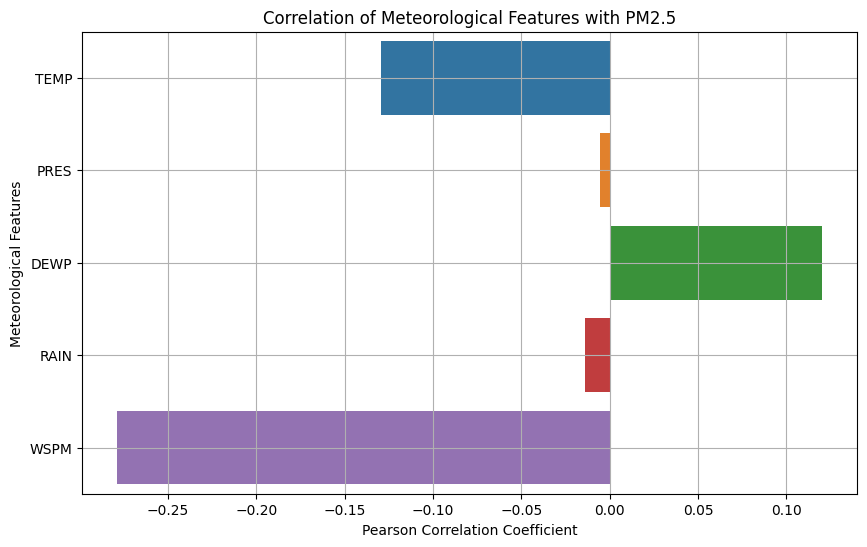

In [30]:
# Re-importing necessary libraries and reloading the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the dataset
target_variable = 'PM2.5'

# Calculate Pearson Correlation Coefficient for each feature with the target variable
correlation_with_target = data.corr()[target_variable]

# Identifying Meteorological Features
meteorological_features = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Extracting the correlation of meteorological features with the target variable
meteo_correlation = correlation_with_target[meteorological_features]

# Create a bar plot for these specific features
plt.figure(figsize=(10, 6))
sns.barplot(x=meteo_correlation.values, y=meteo_correlation.index)

# Adding labels and title
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Meteorological Features')
plt.title('Correlation of Meteorological Features with PM2.5')
plt.grid(True)
plt.show()


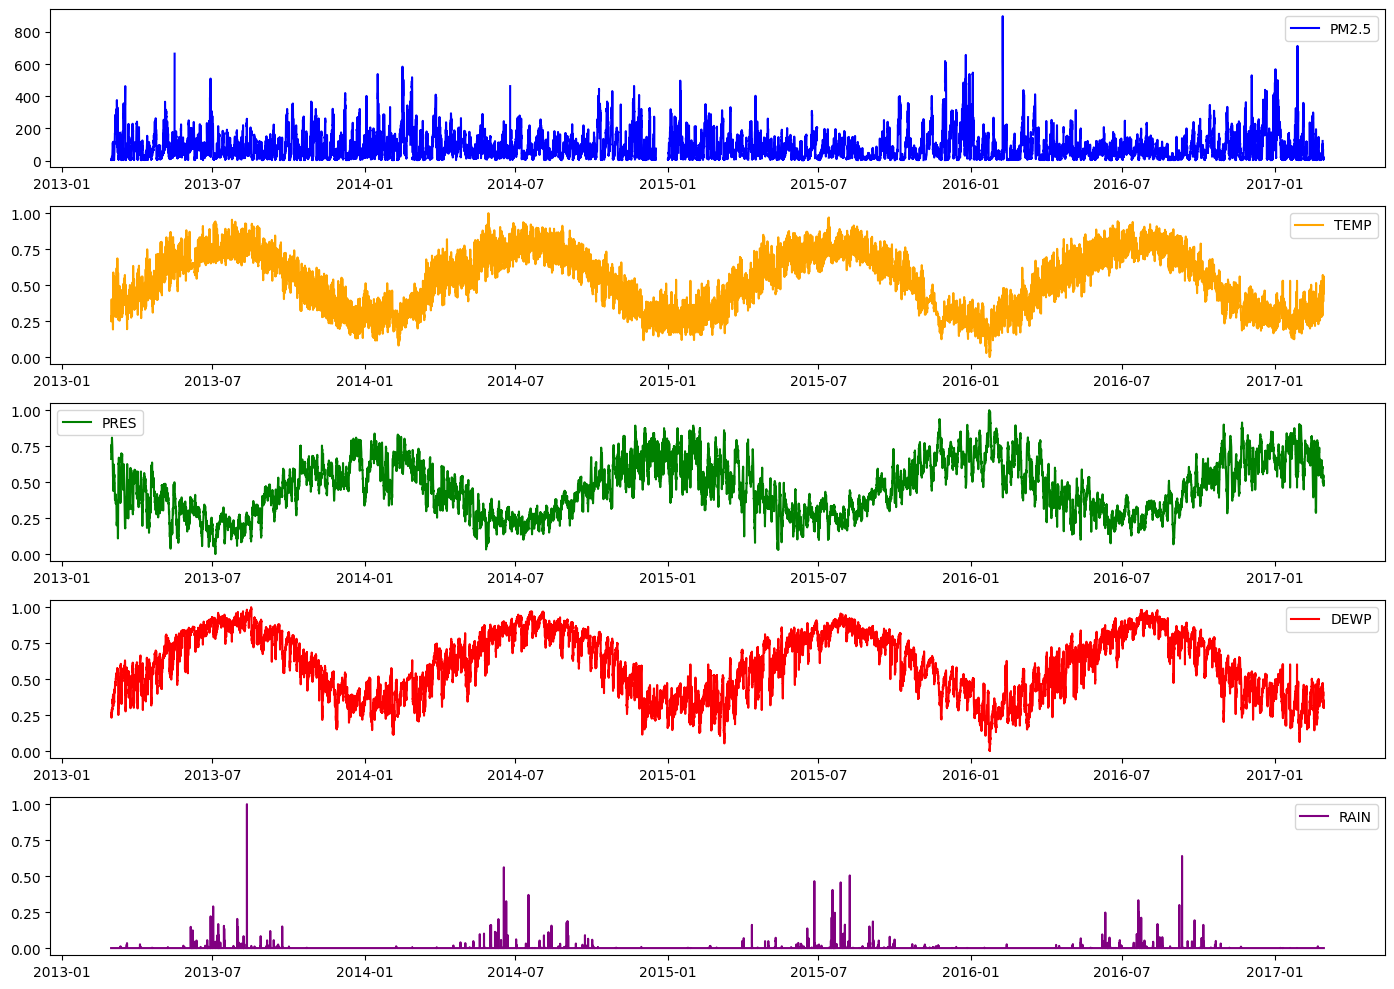

In [31]:
import matplotlib.pyplot as plt
import pandas as pd


# Convert the date information into a datetime object for plotting
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Set the datetime as the index of the dataframe
data.set_index('datetime', inplace=True)

# Plotting PM2.5 and meteorological features over time
plt.figure(figsize=(14, 10))

# PM2.5
plt.subplot(5, 1, 1)
plt.plot(data['PM2.5'], label='PM2.5', color='blue')
plt.legend()

# TEMP
plt.subplot(5, 1, 2)
plt.plot(data['TEMP'], label='TEMP', color='orange')
plt.legend()

# PRES
plt.subplot(5, 1, 3)
plt.plot(data['PRES'], label='PRES', color='green')
plt.legend()

# DEWP
plt.subplot(5, 1, 4)
plt.plot(data['DEWP'], label='DEWP', color='red')
plt.legend()

# RAIN
plt.subplot(5, 1, 5)
plt.plot(data['RAIN'], label='RAIN', color='purple')
plt.legend()

plt.tight_layout()
plt.show()
